<a href="https://colab.research.google.com/github/2303a52443/PNS_2303A52443/blob/main/A4_PNS_30/1/25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving car_data_250.csv to car_data_250 (2).csv
📌 Most Common Price Range: Around $63061.53


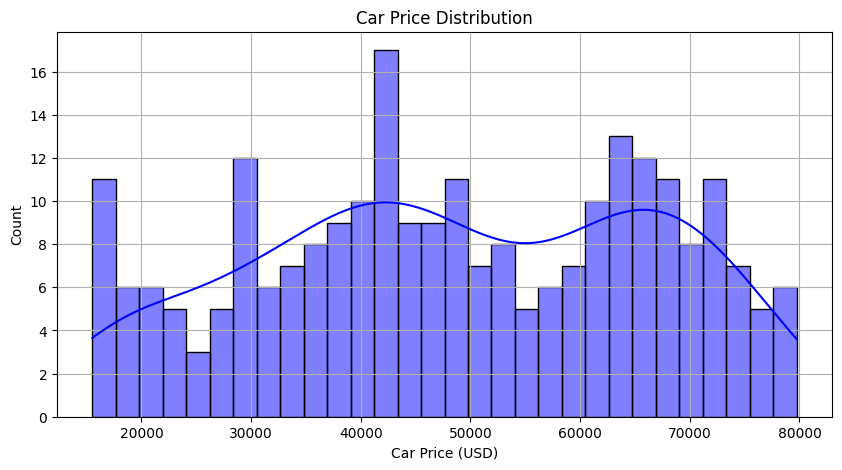

📌 Correlation Between Horsepower & Mileage: -0.05


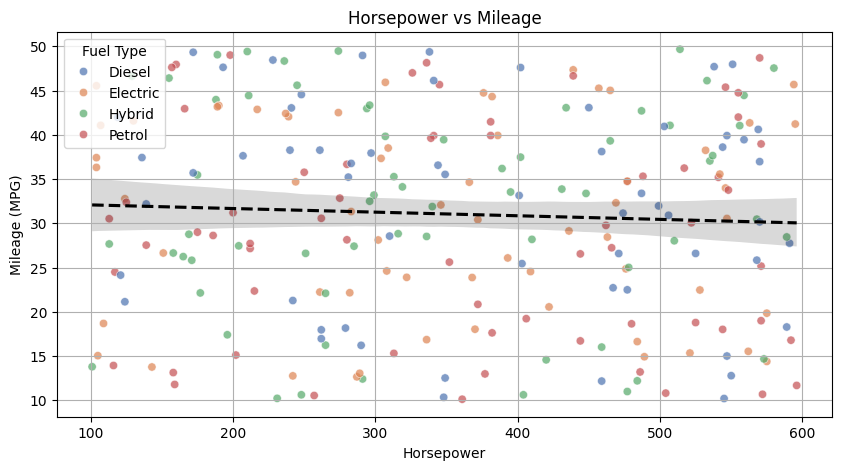

<ipython-input-7-ec0e6429a506>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


📌 Most Popular Car Brand: Toyota


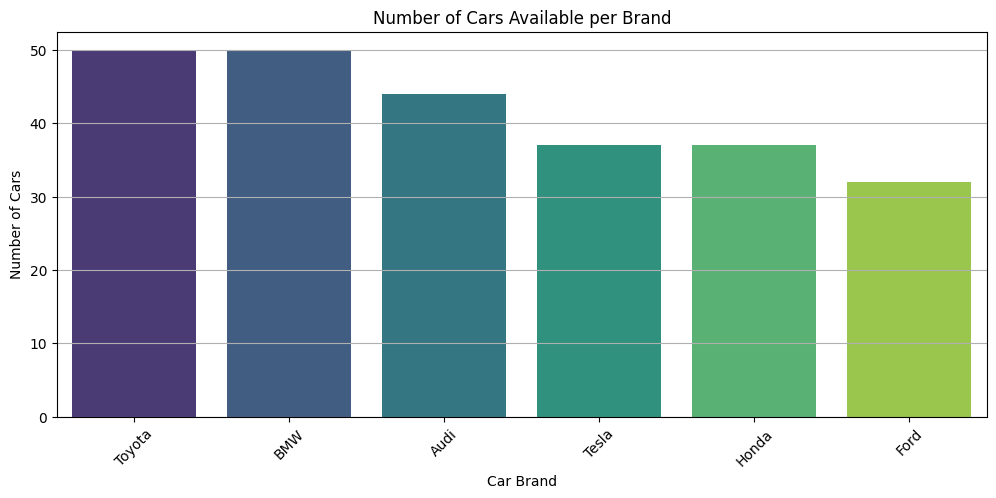

<Figure size 1200x600 with 0 Axes>

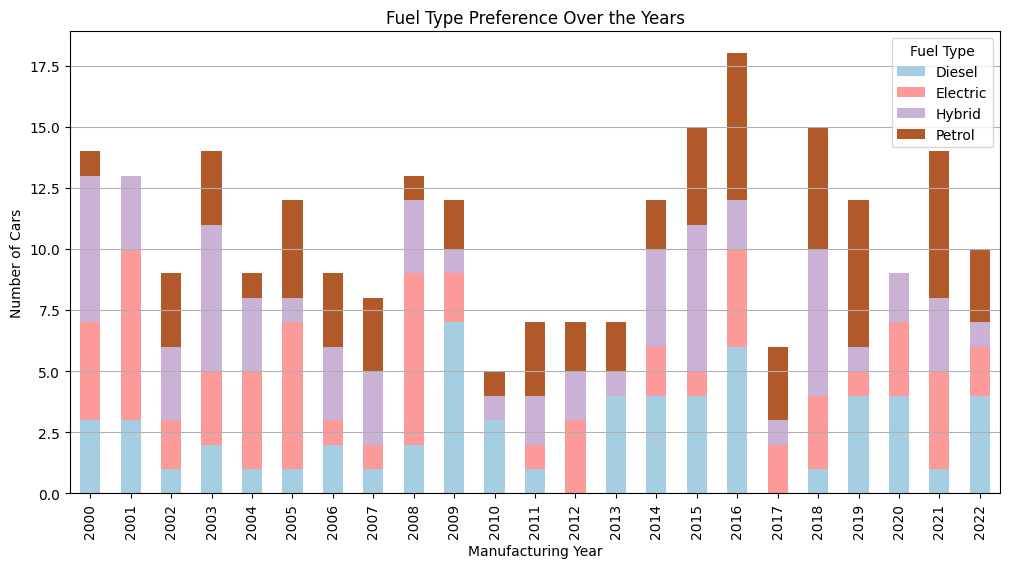

📌 Fuel Type Trend Over Years:
Year
2000              Hybrid
2001            Electric
2002    [Hybrid, Petrol]
2003              Hybrid
2004            Electric
2005            Electric
2006    [Hybrid, Petrol]
2007    [Hybrid, Petrol]
2008            Electric
2009              Diesel
2010              Diesel
2011              Petrol
2012            Electric
2013              Diesel
2014    [Diesel, Hybrid]
2015              Hybrid
2016    [Diesel, Petrol]
2017              Petrol
2018              Hybrid
2019              Petrol
2020              Diesel
2021              Petrol
2022              Diesel
Name: Fuel Type, dtype: object


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()
df.columns = df.columns.str.strip()

numeric_cols = ["Price", "Mileage", "Horsepower", "Year"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=numeric_cols, inplace=True)

# ✅ 1. HISTOGRAM: Analyze price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=30, kde=True, color='blue')
plt.xlabel("Car Price (USD)")
plt.ylabel("Count")
plt.title("Car Price Distribution")
plt.grid(True)

# Find the most common price range
most_common_range = df["Price"].value_counts().idxmax()
print(f"📌 Most Common Price Range: Around ${most_common_range}")
plt.show()

# ✅ 2. SCATTERPLOT: Horsepower vs. Mileage
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Horsepower"], y=df["Mileage"], hue=df["Fuel Type"], palette="deep", alpha=0.7)
sns.regplot(x=df["Horsepower"], y=df["Mileage"], scatter=False, color='black', line_kws={"linestyle": "dashed"})
plt.xlabel("Horsepower")
plt.ylabel("Mileage (MPG)")
plt.title("Horsepower vs Mileage")
plt.legend(title="Fuel Type")
plt.grid(True)

# Calculate correlation
corr_value = df["Horsepower"].corr(df["Mileage"])
print(f"📌 Correlation Between Horsepower & Mileage: {corr_value:.2f}")
plt.show()

# ✅ 3. BAR CHART: Most Popular Car Brand
plt.figure(figsize=(12, 5))
brand_counts = df["Brand"].value_counts()
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Car Brand")
plt.ylabel("Number of Cars")
plt.title("Number of Cars Available per Brand")
plt.grid(axis="y")

# Most popular brand
most_popular_brand = brand_counts.idxmax()
print(f"📌 Most Popular Car Brand: {most_popular_brand}")
plt.show()

# ✅ 4. GROUPED BAR CHART: Fuel Type Preference Over Years
plt.figure(figsize=(12, 6))
fuel_years = df.groupby(["Year", "Fuel Type"]).size().unstack()
fuel_years.plot(kind='bar', stacked=True, colormap='Paired', figsize=(12, 6))
plt.xlabel("Manufacturing Year")
plt.ylabel("Number of Cars")
plt.title("Fuel Type Preference Over the Years")
plt.legend(title="Fuel Type")
plt.grid(axis="y")
plt.show()

# Summary of Fuel Type Trend
fuel_trend = df.groupby("Year")["Fuel Type"].agg(pd.Series.mode)
print(f"📌 Fuel Type Trend Over Years:\n{fuel_trend}")

